In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

# Classification task: other models

Just as we saw for the Regression task:
- there are multiple models for solving a Classification task

For Binary Classification
- the models create different decision boundaries


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [4]:
# Create a more challenging dataset
X, y = make_classification(
    n_samples=200,  # Increased number of samples to have enough data for training and testing
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    class_sep=0.5,
    flip_y=0.1,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
k_neighbors = 3
tree_depth = 3

classifiers = {
    'Logistic Regression': LogisticRegression(),
    f'K-Nearest Neighbors (k={k_neighbors})': KNeighborsClassifier(n_neighbors=k_neighbors),
    # 'SVM (Linear Kernel)': SVC(kernel='linear'),
    'SVM (RBF Kernel)': SVC(kernel='rbf', random_state=42),
    f'Decision Tree (Depth={tree_depth})': DecisionTreeClassifier(max_depth=tree_depth)
}

In [6]:
# Fit the classifiers and compute accuracy
accuracies = {}
for name, clf in classifiers.items():
    _= clf.fit(X_train, y_train)
    accuracies[name] = clf.score(X_test, y_test)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, clf) in enumerate(classifiers.items()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    _= axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
    _=axes[idx].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    _=axes[idx].set_title(f'{name}\nAccuracy: {accuracies[name]:.2f}')
    
plt.tight_layout()

# Hide the figure (for now)
plt.close(fig)


/home/kjp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kjp/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


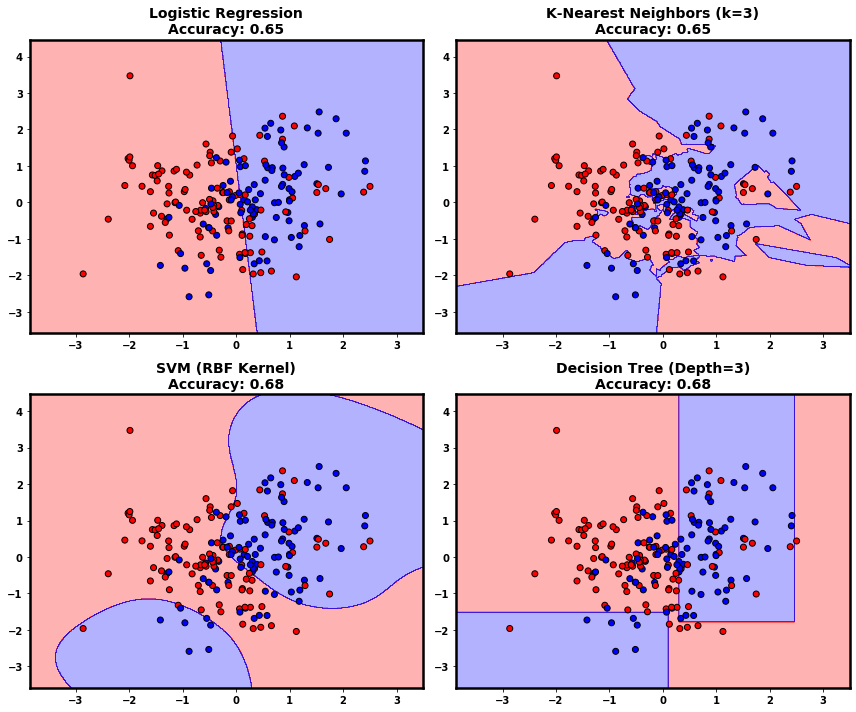

In [7]:
fig

In [8]:
print("Done")

Done
